In [5]:
import os
import csv
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 합성 데이터 생성

year = "2020"
List=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
List_index = 2 ### 2020-01-01은 수요일. index 커지면서 요일 변경됨.
arrival = 13 ### 1시로 입장 시간 초기화
departure = 18 ### 6시로 퇴장 시간 초기화

hehehe=0### 월별로 변수를 만들어볼 거야 이번엔. 3,9월은 좀 늦게 입/퇴장한다.

fname = 'C:/Users/ASUS/Music/SyntheticData'
f = open(fname + '.csv', 'w')
wr = csv.writer(f)

### 1행에 항목 적어두기

f.write("Date")
f.write(',')
f.write("Day")
f.write(',')
f.write("Arrival")
f.write(',')
f.write("Departure")
f.write('\n')

for month in range (1,13): ### 1월부터 12월까지
    if month == 2:
        day_end = 28
    elif month==1 or month==3 or month==5 or month==7 or month==8 or month==10 or month==12:
        day_end = 31
    elif month==4 or month==6 or month==9 or month==11:
        day_end = 30
    for day in range (1,day_end+1):
        if month < 10 and day < 10:
            string = str.format("{}-0{}-0{}",year,month,day)
        elif month < 10 and day >= 10:
            string = str.format("{}-0{}-{}",year,month,day)
        elif month >= 10 and day < 10:
            string = str.format("{}-{}-0{}",year,month,day)
        else:
            string = str.format("{}-{}-{}",year,month,day) ### 날짜 데이터 형식 맞추기
        ### 월요일, 목요일은 늦게 출/퇴근함
        if List_index == 0:
            arrival=arrival+3
            departure=departure+3
        if List_index == 3:
            arrival=arrival+2
            departure=departure+2
        if month == 3 or month ==7:
            hehehe = 1
        else:
            hehehe = 0
        f.write(string)
        f.write(',')
        f.write(List[List_index])
        f.write(',')
        f.write(str(arrival+hehehe))
        f.write(',')
        f.write(str(departure+hehehe))
        f.write('\n')
        List_index=(List_index+1)%7
        arrival=13
        departure=18
        arrival=arrival+(random.randint(-25,30)/35) ### 입장 시간에 랜덤성 부여
        departure=departure+(random.randint(-30,25)/35) ### 퇴장 시간에 랜덤성 부여

f.close()

In [6]:
ulala = pd.read_csv("../Music/ggg.csv")
ulala.head(5)

,Date,Day,Arrival,Departure
0,2020-01-01,Wed,13.000000,18.000000
1,2020-01-02,Thu,13.100000,21.100000
2,2020-01-03,Fri,13.200000,18.533333
3,2020-01-04,Sat,13.933333,19.633333
4,2020-01-05,Sun,12.700000,17.600000


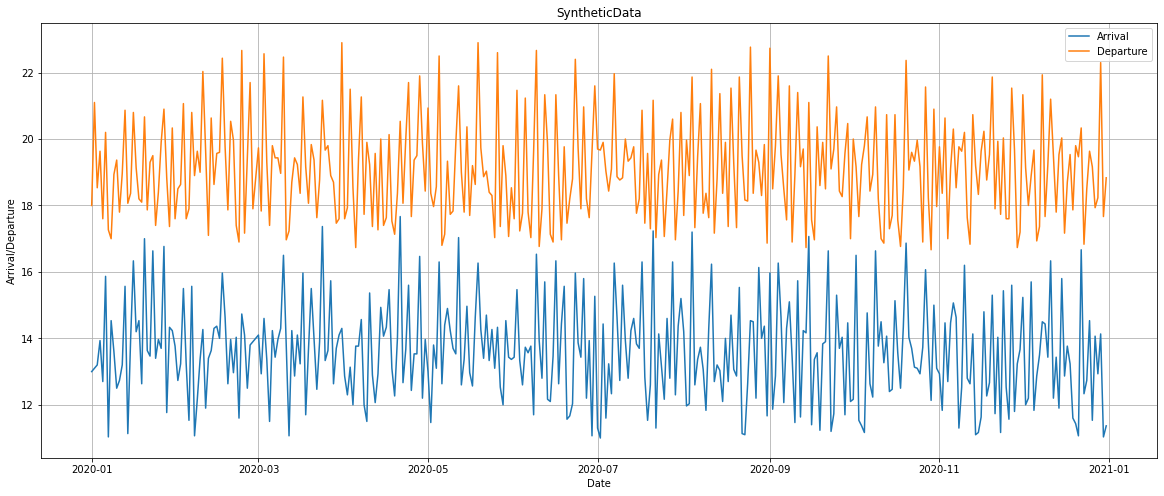

In [7]:
ulala["Date"] = pd.to_datetime(ulala["Date"])
plt.figure(figsize=(20,8))
plt.plot(ulala.Date,ulala.Arrival)
plt.plot(ulala.Date,ulala.Departure)
plt.title("SyntheticData")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.grid()
plt.legend(['Arrival','Departure'])
plt.show()

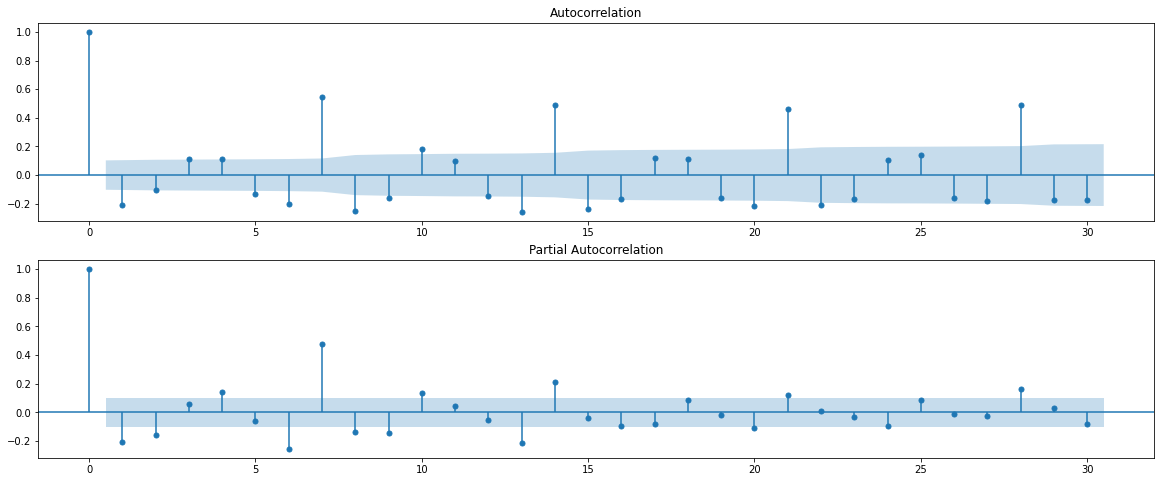

In [8]:
import statsmodels.api as sm

timeSeriesA = ulala.loc[:, ["Date","Arrival"]] ### 입장 시간
timeSeriesA.index = timeSeriesA.Date
tsA = timeSeriesA.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA, lags=30, ax=ax1) ### 그래프를 보면 7일 단위로 자기상관이 높음
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA, lags=30, ax=ax2)

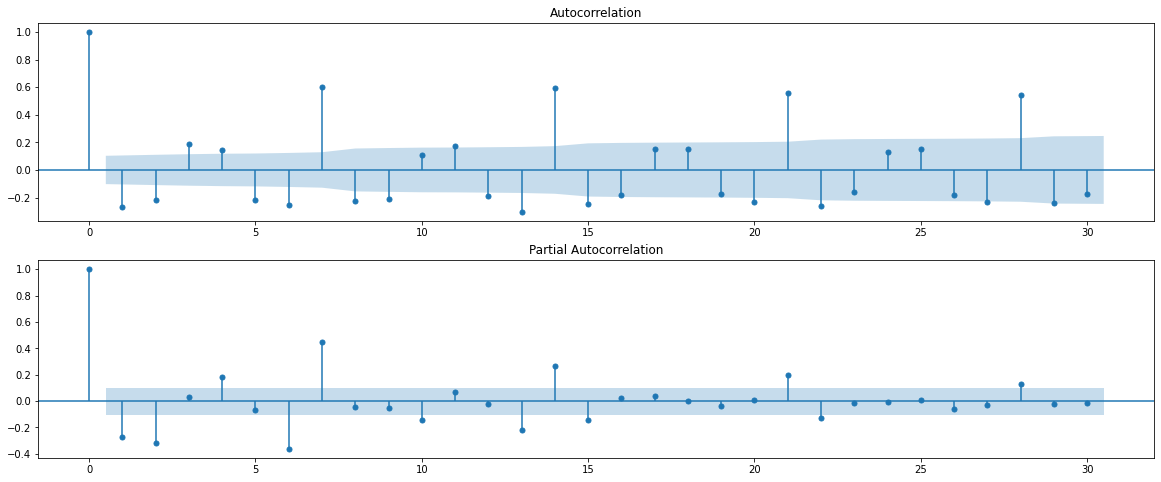

In [9]:
timeSeriesD = ulala.loc[:, ["Date","Departure"]] ### 퇴장 시간
timeSeriesD.index = timeSeriesD.Date
tsD = timeSeriesD.drop("Date",axis=1)

fig = plt.figure(figsize=(20,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsD, lags=30, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsD, lags=30, ax=ax2)

<Figure size 432x288 with 0 Axes>

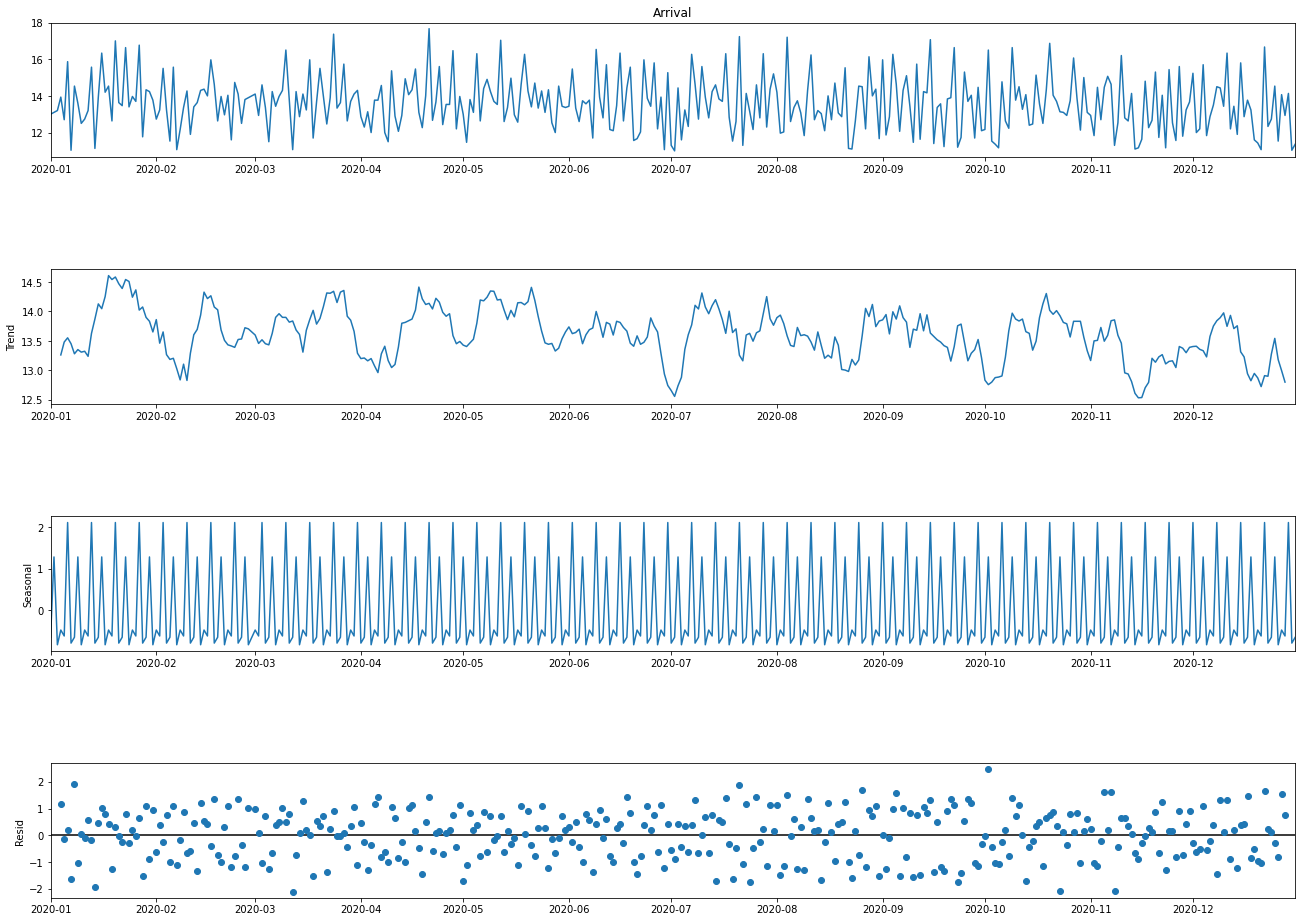

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultA = seasonal_decompose(tsA['Arrival'], model='additive',period=7) ### 7일 단위로 보면 seasonal함

fig = plt.figure()
fig = resultA.plot()
fig.set_size_inches(20, 15)

<Figure size 432x288 with 0 Axes>

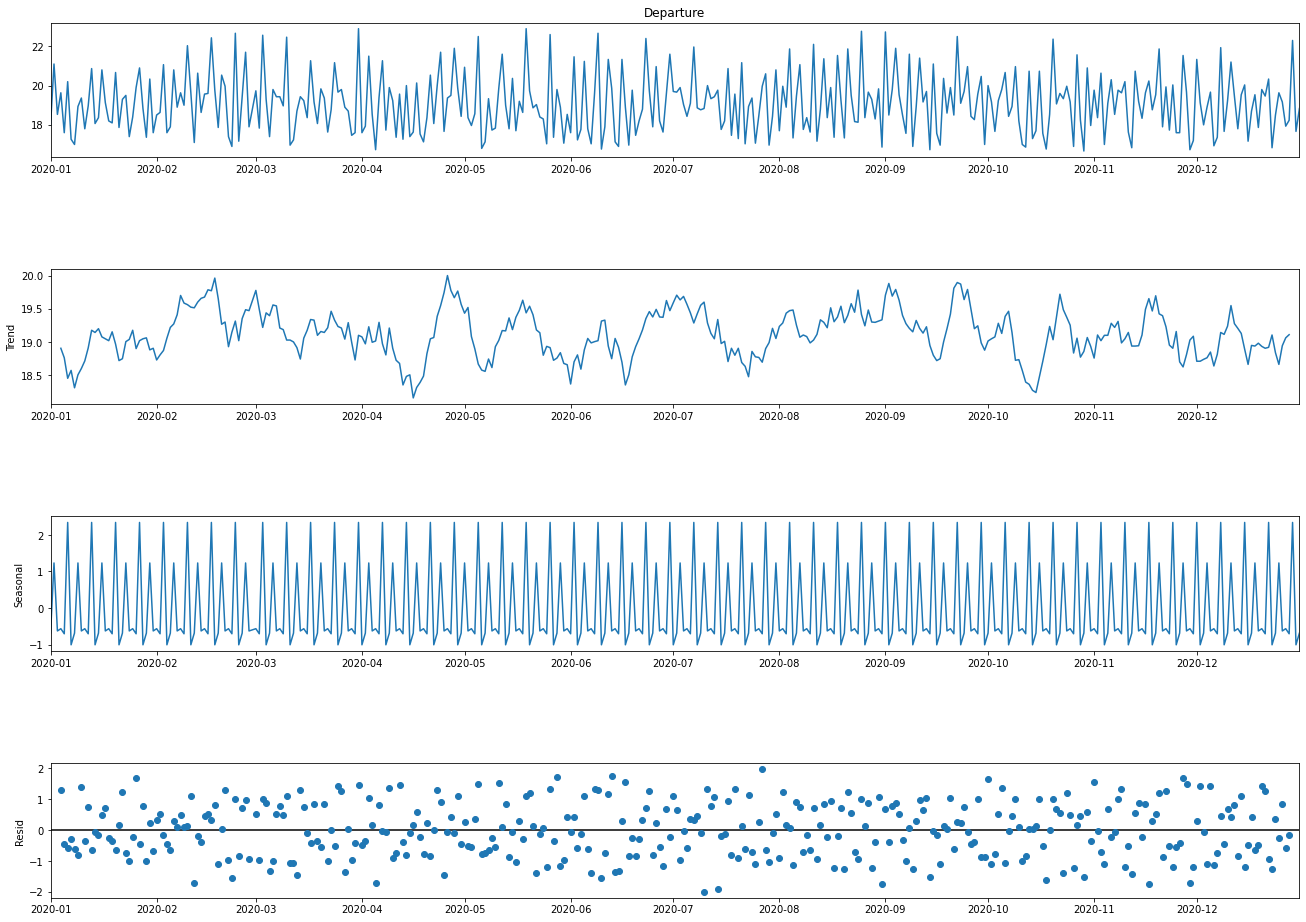

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
resultD = seasonal_decompose(tsD['Departure'], model='additive',period=7) ### 마찬가지로 7일 단위

fig = plt.figure()
fig = resultD.plot()
fig.set_size_inches(20, 15)

In [8]:
### 차분할 필요는 없을 것 같다는 걸 보이기 위함
"""
tsA_diff = tsA - tsA.shift()
fig = plt.figure(figsize=(20,8))
# plt.plot(ts_diff)

ax3 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)
ax4 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)
"""

'\ntsA_diff = tsA - tsA.shift()\nfig = plt.figure(figsize=(20,8))\n# plt.plot(ts_diff)\n\nax3 = fig.add_subplot(211)\nfig = sm.graphics.tsa.plot_acf(tsA_diff[1:], lags=30, ax=ax3)\nax4 = fig.add_subplot(212)\nfig = sm.graphics.tsa.plot_pacf(tsA_diff[1:], lags=30, ax=ax4)\n'

In [18]:
### 결과 ARIMA로 빨리 보고 싶으면 이걸로 보는 게 나음
"""
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

#fit model
modelA = ARIMA(tsA, order=(2,0,2))
modelA_fit = modelA.fit()
modelD = ARIMA(tsD, order=(2,0,2))
modelD_fit = modelD.fit()

#predict
forecastA = modelA_fit.predict(typ='levels')
forecastD = modelD_fit.predict(typ='levels')

#visualization
plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")

plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.legend()
plt.show()
"""

'\nfrom statsmodels.tsa.arima_model import ARIMA\nfrom datetime import datetime\n\n#fit model\nmodelA = ARIMA(tsA, order=(2,0,2))\nmodelA_fit = modelA.fit()\nmodelD = ARIMA(tsD, order=(2,0,2))\nmodelD_fit = modelD.fit()\n\n#predict\nforecastA = modelA_fit.predict(typ=\'levels\')\nforecastD = modelD_fit.predict(typ=\'levels\')\n\n#visualization\nplt.figure(figsize=(22,8))\nplt.plot(ulala.Date,ulala.Arrival, label = "originalA")\nplt.plot(ulala.Date,ulala.Departure, label = "originalD")\n\nplt.plot(forecastA, label = "predictedA")\nplt.plot(forecastD, label = "predictedD")\n\nplt.title("Time Series Forecast")\nplt.xlabel("Date")\nplt.ylabel("Arrival/Departure")\nplt.legend()\nplt.show()\n'

In [25]:
### ARIMA랑 SARIMA랑 forecast 조금 다름. 이건 ARIMA
"""
foreA = modelA_fit.forecast(steps=31)
foreD = modelD_fit.forecast(steps=31)
predA = foreA[0].tolist()
predD = foreD[0].tolist()
plt.plot(predA, label = "predA")
plt.plot(predD, label = "predD")
plt.legend()
plt.grid()
"""

'\nforeA = modelA_fit.forecast(steps=31)\nforeD = modelD_fit.forecast(steps=31)\npredA = foreA[0].tolist()\npredD = foreD[0].tolist()\nplt.plot(predA, label = "predA")\nplt.plot(predD, label = "predD")\nplt.legend()\nplt.grid()\n'

In [11]:
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime

### SARIMA에 파라미터 넣어서 최선의 모델 구함
### d=0으로 놓고 돌리면 243번 밖에 계산 안 할 것임. 지금은 721번 돌아감

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

import itertools
import warnings

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

warnings.filterwarnings("ignore") # specify to ignore warning messages

opt_aic = 10000
opt_param = []
opt_param_seasonal = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(tsA,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            if opt_aic > results.aic:
                opt_aic = results.aic
                opt_param = param
                opt_param_seasonal = param_seasonal
            
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2939.702850019141
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2461.280424432405
SARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:2148.6167913470454
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1574.6945754664432
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1283.6460462917119
SARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1231.0573187542634
SARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1923.2814769919205
SARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:1506.6877679552745
SARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:1256.0349829763054
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1578.6931264550394
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1330.525096123361
SARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1283.2937590265187
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1364.425787070108
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1285.0253749060294
SARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:1228.4860412712274
SARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:1561.669364672982
SARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:1365.9118803404149
SARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AI

SARIMA(0, 1, 2)x(1, 0, 1, 12)12 - AIC:1247.8967549675979
SARIMA(0, 1, 2)x(1, 0, 2, 12)12 - AIC:1203.0105440963591
SARIMA(0, 1, 2)x(1, 1, 0, 12)12 - AIC:1355.8633969515854
SARIMA(0, 1, 2)x(1, 1, 1, 12)12 - AIC:1244.6784937784944
SARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:1194.6987545046559
SARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:1566.06078076392
SARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:1348.1143279994756
SARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:1239.105850760323
SARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:1213.5838617693385
SARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:1214.071484740235
SARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:1203.9406765474232
SARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:1282.57468923264
SARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:1209.7255948843751
SARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:1201.539346549634
SARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:1401.2563254190613
SARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:1293.0787794517878
SARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:1262.7783723586163
SARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:

SARIMA(1, 0, 1)x(2, 0, 2, 12)12 - AIC:1244.277300639244
SARIMA(1, 0, 1)x(2, 1, 0, 12)12 - AIC:1275.0272386123215
SARIMA(1, 0, 1)x(2, 1, 1, 12)12 - AIC:1211.9462213674979
SARIMA(1, 0, 1)x(2, 1, 2, 12)12 - AIC:1207.9736030355073
SARIMA(1, 0, 1)x(2, 2, 0, 12)12 - AIC:1394.614357147189
SARIMA(1, 0, 1)x(2, 2, 1, 12)12 - AIC:1280.2596691220585
SARIMA(1, 0, 1)x(2, 2, 2, 12)12 - AIC:1259.5466652764424
SARIMA(1, 0, 2)x(0, 0, 0, 12)12 - AIC:1305.3219488798586
SARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1249.1283045019277
SARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1221.8510326892415
SARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1521.8757022989048
SARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:1249.2546877997006
SARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:1199.0170864951317
SARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:1840.8063374534554
SARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:1449.4001276708414
SARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:1222.7807605359837
SARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1263.5104356662189
SARIMA(1, 0, 2)x(1, 0, 1, 12)12 -

SARIMA(1, 2, 1)x(0, 1, 1, 12)12 - AIC:1459.0969551508642
SARIMA(1, 2, 1)x(0, 1, 2, 12)12 - AIC:1375.3236359220039
SARIMA(1, 2, 1)x(0, 2, 0, 12)12 - AIC:2143.2788967381703
SARIMA(1, 2, 1)x(0, 2, 1, 12)12 - AIC:1711.8370070284427
SARIMA(1, 2, 1)x(0, 2, 2, 12)12 - AIC:1426.3775463279383
SARIMA(1, 2, 1)x(1, 0, 0, 12)12 - AIC:1425.4840529283647
SARIMA(1, 2, 1)x(1, 0, 1, 12)12 - AIC:1418.665780707202
SARIMA(1, 2, 1)x(1, 0, 2, 12)12 - AIC:1359.6022169951075
SARIMA(1, 2, 1)x(1, 1, 0, 12)12 - AIC:1519.2371760493331
SARIMA(1, 2, 1)x(1, 1, 1, 12)12 - AIC:1420.9003381482867
SARIMA(1, 2, 1)x(1, 1, 2, 12)12 - AIC:1361.710759350461
SARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:1732.9067209568739
SARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:1512.9229911310458
SARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:1404.031219043055
SARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:1369.3863682553917
SARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:1371.0434768364626
SARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:1359.789221288511
SARIMA(1, 2, 1)x(2, 1, 0, 12)12 - A

SARIMA(2, 1, 0)x(1, 1, 2, 12)12 - AIC:1311.1451452917333
SARIMA(2, 1, 0)x(1, 2, 0, 12)12 - AIC:1644.4813663390983
SARIMA(2, 1, 0)x(1, 2, 1, 12)12 - AIC:1454.8783286555458
SARIMA(2, 1, 0)x(1, 2, 2, 12)12 - AIC:1351.214945666824
SARIMA(2, 1, 0)x(2, 0, 0, 12)12 - AIC:1309.4979580240038
SARIMA(2, 1, 0)x(2, 0, 1, 12)12 - AIC:1311.1497961844552
SARIMA(2, 1, 0)x(2, 0, 2, 12)12 - AIC:1311.7732686196937
SARIMA(2, 1, 0)x(2, 1, 0, 12)12 - AIC:1371.1039983468477
SARIMA(2, 1, 0)x(2, 1, 1, 12)12 - AIC:1310.784207216249
SARIMA(2, 1, 0)x(2, 1, 2, 12)12 - AIC:1309.652251225419
SARIMA(2, 1, 0)x(2, 2, 0, 12)12 - AIC:1486.4715371317675
SARIMA(2, 1, 0)x(2, 2, 1, 12)12 - AIC:1373.2168780577629
SARIMA(2, 1, 0)x(2, 2, 2, 12)12 - AIC:1351.5081114953182
SARIMA(2, 1, 1)x(0, 0, 0, 12)12 - AIC:1301.8653802494541
SARIMA(2, 1, 1)x(0, 0, 1, 12)12 - AIC:1254.1735814742349
SARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1208.9035181320064
SARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1518.3124582581663
SARIMA(2, 1, 1)x(0, 1, 1, 12)12 - 

SARIMA(2, 2, 2)x(2, 2, 0, 12)12 - AIC:1405.2838158246655
SARIMA(2, 2, 2)x(2, 2, 1, 12)12 - AIC:1300.2039727491592
SARIMA(2, 2, 2)x(2, 2, 2, 12)12 - AIC:1293.8918332579353


NameError: name 'SARIMAX' is not defined

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581:

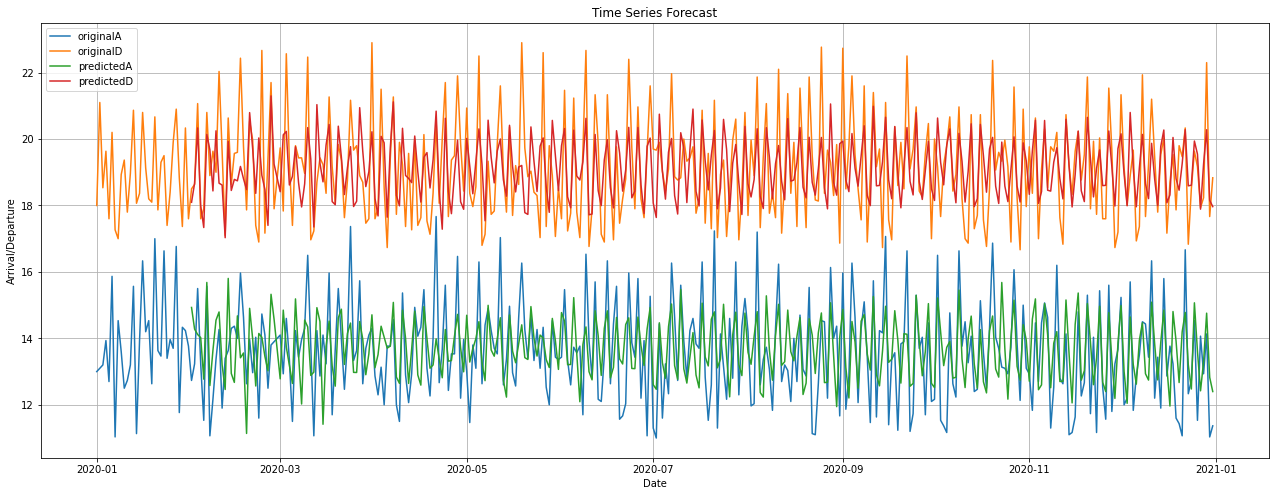

In [15]:
import statsmodels.api as sm

### 돌려보니까 (opt_param, opt_param_seasonal) = (2, 0, 2) (2, 1, 2, 12)

# modelA = sm.tsa.statespace.SARIMAX(tsA, order=opt_param, seasonal_order=opt_param_seasonal)
# modelD = sm.tsa.statespace.SARIMAX(tsD, order=opt_param, seasonal_order=opt_param_seasonal)

modelA = sm.tsa.statespace.SARIMAX(tsA, order=(2,0,2), seasonal_order=(2,1,2,12))
modelD = sm.tsa.statespace.SARIMAX(tsD, order=(2,0,2), seasonal_order=(2,1,2,12))

modelA_fit = modelA.fit()
modelD_fit = modelD.fit()
forecastA = modelA_fit.predict(start='2020-02-01',typ='levels')
forecastD = modelD_fit.predict(start='2020-02-01',typ='levels')

plt.figure(figsize=(22,8))
plt.plot(ulala.Date,ulala.Arrival, label = "originalA")
plt.plot(ulala.Date,ulala.Departure, label = "originalD")
plt.plot(forecastA, label = "predictedA")
plt.plot(forecastD, label = "predictedD")

plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Arrival/Departure")
plt.grid()
plt.legend()
plt.show()

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


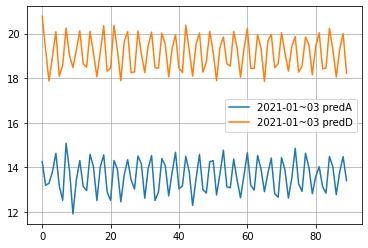

In [17]:
### 미래 예측하면 이렇게 됨

foreA = modelA_fit.forecast(steps=90)
foreD = modelD_fit.forecast(steps=90)
predA = foreA.tolist()
predD = foreD.tolist()
plt.plot(predA, label = "2021-01~03 predA")
plt.plot(predD, label = "2021-01~03 predD")
plt.legend()
plt.grid()